In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras import *

In [23]:
dataset=pd.read_csv(r"C:\Users\naruk\OneDrive\Desktop\diamonds.csv")

In [24]:
dataset.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [25]:
dataset.cut[dataset.cut=="Fair"]=1
dataset.cut[dataset.cut=="Good"]=2
dataset.cut[dataset.cut=="Very Good"]=3
dataset.cut[dataset.cut=="Premium"]=4
dataset.cut[dataset.cut=="Ideal"]=1
dataset.clarity[dataset.clarity=="SI2"]=1
dataset.clarity[dataset.clarity=="SI1"]=2
dataset.clarity[dataset.clarity=="VS1"]=3
dataset.clarity[dataset.clarity=="VS2"]=4
dataset.clarity[dataset.clarity=="VVS2"]=5
dataset.clarity[dataset.clarity=="VVS1"]=6
dataset.clarity[dataset.clarity=="I1"]=7
dataset.clarity[dataset.clarity=="IF"]=8

C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naruk\Anac

In [26]:
origin = dataset.pop('carat')

In [27]:
o=dataset.pop('clarity')

In [28]:
dataset['fair'] = (origin == 1)*1.0
dataset['good'] = (origin == 2)*1.0
dataset['very good'] = (origin == 3)*1.0
dataset['premium'] = (origin == 4)*1.0
dataset['ideal'] = (origin == 5)*1.0
dataset['s1'] = (o == 1)*1.0
dataset['s2'] = (o == 2)*1.0
dataset['vs1'] = (o == 3)*1.0
dataset['vs2'] = (o == 4)*1.0
dataset['vvs2'] = (o == 5)*1.0
dataset['vvs1'] = (o== 6)*1.0
dataset['i1'] = (o == 7)*1.0
dataset['i2'] = (o == 8)*1.0


In [29]:
type(dataset)
dataset=dataset.drop("color",axis=1)

In [30]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [31]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

normed_train_data=sc.fit_transform(train_dataset)
normed_test_data=sc.fit_transform(test_dataset)

In [33]:
test_labels=test_labels.to_numpy()
train_labels=train_labels.to_numpy()

In [72]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    klayers.Dense(8, activation='relu')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mse',
                optimizer=keras.optimizers.Adam())
  return model

In [73]:
model = build_model()

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Dense object at 0x000001DEE570F5C0>

In [20]:
normed_train_data.shape

(43152, 20)

In [16]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [124]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [21]:
example_batch = normed_train_data[:2]
example_result = model.predict(example_batch)
example_result

array([[-0.38997608],
       [-0.43708777]], dtype=float32)

In [37]:

EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)
  

Train on 34521 samples, validate on 8631 samples
Epoch 1/100
34521/34521 [==============================] - 3s 77us/sample - loss: 30156521.7159 - mae: 3761.0386 - mse: 30156526.0000 - val_loss: 27060357.6496 - val_mae: 3382.2842 - val_mse: 27060366.0000
Epoch 2/100
34521/34521 [==============================] - 2s 52us/sample - loss: 23948412.2958 - mae: 3037.0454 - mse: 23948412.0000 - val_loss: 19193957.4351 - val_mae: 2475.6060 - val_mse: 19193958.0000
Epoch 3/100
34521/34521 [==============================] - 2s 52us/sample - loss: 15435443.2034 - mae: 2050.8682 - mse: 15435453.0000 - val_loss: 11028484.9240 - val_mae: 1592.2743 - val_mse: 11028487.0000
Epoch 4/100
34521/34521 [==============================] - 2s 53us/sample - loss: 8667566.2103 - mae: 1427.1899 - mse: 8667562.0000 - val_loss: 5670911.3459 - val_mae: 1089.8020 - val_mse: 5670912.5000
Epoch 5/100
34521/34521 [==============================] - 2s 55us/sample - loss: 4236269.8594 - mae: 976.0599 - mse: 4236271.0000 

KeyboardInterrupt: 

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels,verbose=2)

10788/1 - 1s - loss: 823990.0154 - mae: 571.1887 - mse: 1617902.1250


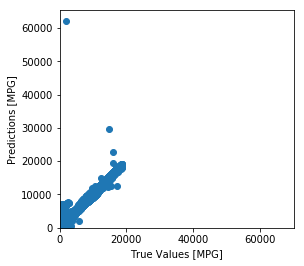

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [5]:
model=keras.Sequential()

In [20]:
model.add(layers.Dense(32,batch_input_shape=[76,32]))
model.add(layers.Dense(32),activation=)